In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pywt

from scipy.signal import savgol_filter, general_gaussian, medfilt
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from scipy.ndimage import gaussian_filter1d as gfilter


In [3]:
data=pd.read_excel(r"/content/drive/MyDrive/PS1/Dataset_SOFT.xlsx")
df=pd.DataFrame(data)
x=input("Enter plastic type:")
plastic=df[df['Type']==x]

Enter plastic type:PET


Pre_Processing


In [10]:
def preproc(input_data):
  proc_data=np.zeros_like(input_data.iloc[:,1:])
  sample_data=np.asarray(input_data.iloc[:,1:])
  for i in range(plastic.shape[0]):
    proc_data[i,:]=gfilter(sample_data[i,:], sigma=1)

    proc_data[i,:]=detrend(proc_data[i,:], order=5)

    coeffs=pywt.wavedec(proc_data[i,:], 'db6', level=7)
    new_coeffs = coeffs.copy()
    new_coeffs[0] = 0*new_coeffs[0]
    proc_data[i,:] = pywt.waverec(new_coeffs, 'db6')

  return (proc_data)

toplot=preproc(plastic)

Text(0, 0.5, 'Absorbance')

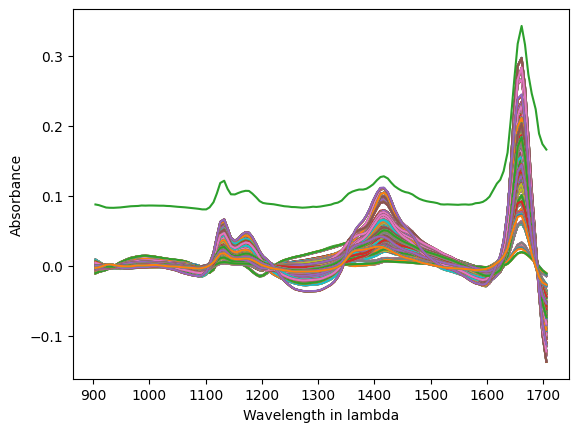

In [14]:
for i in range(toplot.shape[0]):
  plt.plot(plastic.columns[1:], toplot[i])

plt.plot(plastic.mean(axis=0, numeric_only=True))
plt.xlabel("Wavelength in lambda")
plt.ylabel("Absorbance")

Text(0, 0.5, 'Absorbance')

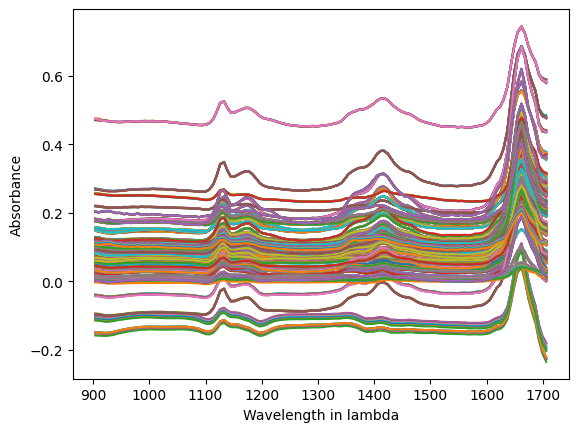

In [13]:
for i in range(plastic.shape[0]):
  plt.plot(plastic.columns[1:], plastic.iloc[i,1:], )
plt.xlabel("Wavelength in lambda")
plt.ylabel("Absorbance")